# Computer Vision 2   (CV2  of MIA)

###  Video Analysis Lectures  

## 1.  Outline  of Classes on Video Analysis

In this class, we shall gain some experience with classical algorithms for video analysis. 

Here, the field is divided in the following manner: 


**Vid-Class 01:**
1. Motion Analysis with Background Subtraction
2. Lab: Comparison of methods

**Vid-Class 02:** 
1. Optical Flow I:  Methods
2. Lab: Example with Classification

**Vid-Class 03:**  
1. Object Tracking in Videos I:   classical techniques; features, probablistic kernels, ML/DNN tracking,
2. Lab: Examples with object tracking and stabilization 

**Vid-Class 04:**
1. Object Tracking in Video II:  
2. Lab: Advanced tracking and Intro to Pose/Gesture recogntion in videos


# Preliminaries

## OpenCV for Videos

Here we will use openCV  (just as in the first course CV1)

- As you know, OpenCV is an open-source computer vision library that contains many standard utilities for image and video processing, such as filtering, feature detection, object recognition, and camera calibration.

- It is widely used for real-time video; it is fast.

- Wrapping from python is fast because it relies on calls;  all the algorithms run a C++ speeds.

- There are lots of extra libraries that are associated with OpenCV.  We shall see some of them here.


Just in case you don't have the environment setup, we will just look at some simple operations first as a review.

### 3.1 Read video file from a source

In [ ]:
## uncomment if needed (or install with Anaconda)
#!pip install opencv

In [1]:
# import the library
import cv2
import matplotlib.pyplot as plt
%matplotlib inline


source = './videos/race_car.mp4'  # source = 0 for webcam

cap = cv2.VideoCapture(source)

In [2]:
if (cap.isOpened()== False): 
  print("Error opening video stream or file")


### Read and display one frame

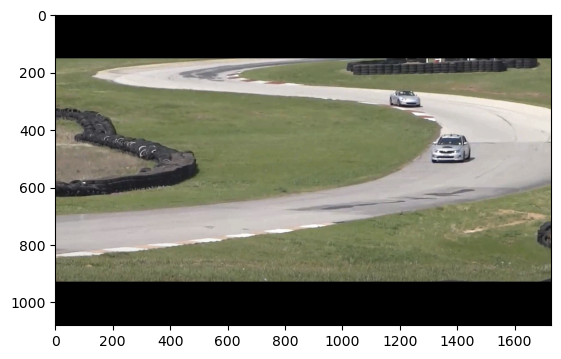

In [3]:
ret, frame = cap.read()
plt.imshow(frame[...,::-1])

### Note:  
A note on the above.   Don't forget in openCV, images are read in BGR instead of RGB.    The color displayed above is different from the actual image. This is because matplotlib expects the image in RGB format whereas OpenCV stores images in BGR format. Thus, for correct display, we need to reverse the channels of the image. We will discuss about the channels in the sections below.

For this reason, the above frame is written with the -1.   For a a quick refresher:  


### Reading images using OpenCV

OpenCV allows reading different types of images (JPG, PNG, etc). You can load grayscale images, color images or you can also load images with Alpha channel. It uses the **`cv2.imread()`** function which has the following syntax:

### <font color="green">Function Syntax </font>
``` python
retval = cv2.imread( filename[, flags] )
```

`retval`: Is the image if it is successfully loaded. Otherwise it is `None`. This may happen if the filename is wrong or the file is corrupt.

The function has **1 required input argument** and one optional flag:


1. `filename`: This can be an **absolute** or **relative** path. This is a **mandatory argument**.
2. `Flags`:    These flags are used to read an image in a particular format (for example, grayscale/color/with alpha channel). This is an **optional argument** with a default value of `cv2.IMREAD_COLOR` or `1` which loads the image as a color image.

Before we proceed with some examples, let's also have a look at some of the `flags` available.

**Flags**
1. **`cv2.IMREAD_GRAYSCALE`** or **`0`**: Loads image in grayscale mode
2. **`cv2.IMREAD_COLOR`** or **`1`**: Loads a color image. Any transparency of image will be neglected. It is the default flag.
3. **`cv2.IMREAD_UNCHANGED`** or **`-1`**: Loads image as such including alpha channel.


### <font color="green">OpenCV Documentation</font>

**`Imread:`**https://docs.opencv.org/4.5.1/d4/da8/group__imgcodecs.html#ga288b8b3da0892bd651fce07b3bbd3a56

**`ImreadModes:`** https://docs.opencv.org/4.5.1/d8/d6a/group__imgcodecs__flags.html#ga61d9b0126a3e57d9277ac48327799c80

### Display the video file 
Here in the notebook, you can display video players with the following inline HTML command.

In [4]:
from IPython.display import HTML
HTML("""
<video width=1024 controls src="./videos/race_car.mp4"></video>
""")

### 3.3 Write Video using OpenCV
For writing the video, you need to create a videowriter object with the right parameters.

### <font color="green">Function Syntax</font>
```python
VideoWriter object=   cv.VideoWriter( filename, fourcc, fps, frameSize  )
```
where,
**Parameters**

1. `filename`: Name of the output video file.
2. `fourcc`: 4-character code of codec used to compress the frames. For example, VideoWriter::fourcc('P','I','M','1') is a MPEG-1 codec, VideoWriter::fourcc('M','J','P','G') is a motion-jpeg codec etc. List of codes can be obtained at Video Codecs by FOURCC page. FFMPEG backend with MP4 container natively uses other values as fourcc code: see ObjectType, so you may receive a warning message from OpenCV about fourcc code conversion.
3. `fps`: Framerate of the created video stream.
4. `frameSize`: Size of the video frames.

In [5]:
## NOTE:  Anaconda/python build problems with codecs: 
# https://www.swiftlane.com/blog/generating-mp4s-using-opencv-python-with-the-avc1-codec/

# Default resolutions of the frame are obtained.
# Convert the resolutions from float to integer.
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))

# Define the codec and create VideoWriter object.
## Should work on some systems.
#fourcc = cv2.VideoWriter_fourcc(*'mp4v')

#out_avi = cv2.VideoWriter('race_car_out.avi',cv2.VideoWriter_fourcc('M','J','P','G'), 10, (frame_width,frame_height))
#out_mp4 = cv2.VideoWriter('race_car_out.mp4',cv2.VideoWriter_fourcc(*'XVID'), 10, (frame_width,frame_height))

### Note: 
Some problems exist with reading and writing videos due to the build of versions of OpenCV in python.
For the moment, we will not require this, but it would require a rebuild of the openCV library, and including the codecs on the build line.


To rebuild openCV on Linux: 
https://docs.opencv.org/4.x/d7/d9f/tutorial_linux_install.html


## Alternative solution: 

Given that there are problems with the codec for pip/anaconda builds of openCV,  one solution is to write the files and then form a video with ``ffmpeg``.  

Imagine you have a directory  ``/input/`` consisting of a set of jpg images,  then the ``ffmpeg`` command on the terminal that can form a video is the following: 

```
ffmpeg -framerate 25 -pattern_type glob -i './input/*.jpg' -c:v libx264 -pix_fmt yuv420p test.mp4
```

- ``-framerate 25``: Sets the output video frame rate to 25 frames per second.
- ``-pattern_type glob``: Specifies that ffmpeg should use glob pattern matching to read the input files. This allows you to specify a directory of images using a wildcard character (*) instead of listing each file individually.
- ``-i './input/*.jpg'``: Specifies the input files for ffmpeg. In this case, we use a glob pattern to match all .jpg files in the ./input/ directory.
- ``-c:v libx264``: Sets the video codec to libx264, which is a widely-used and high-quality video codec.
- ``-pix_fmt yuv420p``: Sets the pixel format to yuv420p, which is a standard pixel format that is widely supported by video players.
- ``test.mp4``: Specifies the output file name and format. In this case, we're creating an MP4 video file named test.mp4.


Imagine that the ``./input/`` directory contains these files:


```
-rw-rw-r-- 1 david david 13749 feb 26  2010 in000001.jpg
-rw-rw-r-- 1 david david 13748 feb 26  2010 in000002.jpg
-rw-rw-r-- 1 david david 13736 feb 26  2010 in000003.jpg
-rw-rw-r-- 1 david david 13751 feb 26  2010 in000004.jpg
-rw-rw-r-- 1 david david 13745 feb 26  2010 in000005.jpg

...
```
Then the output of the above ffmpeg command is the video below.  

**Note:**  this example is relevant because it is part of one of the exercises in the first topic of today's class.

In [6]:
from IPython.display import HTML
HTML("""
<video controls src="./videos/highway_test.mp4"></video>
""")

### 3.4  Read frames

We will read the frames from the race-car video and write the same to the two objects we created in the previous step. We should release the objects after the task is complete.

In [7]:
# Read until video is completed
while(cap.isOpened()):
  # Capture frame-by-frame
  ret, frame = cap.read()
    
  if ret == True:
    
    # Write the frame to the output files
    out_avi.write(frame)
    out_mp4.write(frame)
    
  # Break the loop
  else: 
    break

NameError: name 'out_avi' is not defined

In [ ]:
# When everything done, release the VideoCapture and VideoWriter objects
cap.release()
out_avi.release()
out_mp4.release()

# Exercise

1.  Familiarize yourself with the extensive documentation that is on openCV.  Although not as complete as the opencv docs,  the [OpenCV-Python Tutorials](https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_tutorials.html) on readthedocs is quite good.

# Clase 1:  Background Subtraction for motion analysis

To begin our discussion,  we will look at two classic techniques for analyzing motion: 

1.  **Background subtraction:**   (classical methods and ML based)


# Classical Background Subtraction Methods

The general idea:
- Background subtraction (BS) is a common and widely used technique for generating a foreground mask (namely, a binary image containing the pixels belonging to moving objects in the scene) by using static cameras.
- As the name suggests, BS calculates the foreground mask performing a subtraction between the current frame and a background model, containing the static part of the scene or, more in general, everything that can be considered as background given the characteristics of the observed scene.

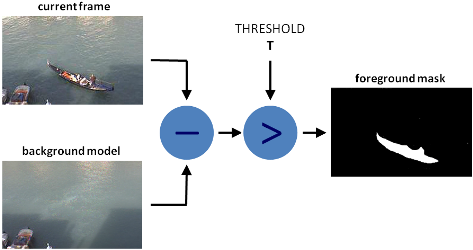


Background modeling consists of two main steps:

1. Background Initialization;
2. Background Update.

- In the first step, an initial model of the background is computed, while in the second step that model is updated in order to adapt to possible changes in the scene.

- In this tutorial we will learn how to perform BS by using OpenCV.




Here, we will see how to do the following with OpenCV:

1. Read data from videos or image sequences by using cv2::VideoCapture ;
2. Create and update the background model by using cv2::BackgroundSubtractor class;
3. Get and show the foreground mask by using cv2::imshow ;

##  Background Methods


Background subtraction is a technique used in computer vision to detect moving objects in a video sequence by subtracting the static background from the current frame. OpenCV provides several classic algorithms for background foreground subtraction. Here are some of the most common ones:

- **MOG (Mixture of Gaussians):** This algorithm models the background as a mixture of Gaussian distributions and classifies each pixel in the current frame as foreground or background based on whether it falls within or outside the model. In OpenCV, you can use the *cv2.createBackgroundSubtractorMOG()* function to create a MOG background subtractor.

- **MOG2:** MOG2 is an improved version of the MOG algorithm that uses a more robust method for modeling the background. It also adapts the parameters of the model over time to handle changes in the lighting and background. In OpenCV, you can use the *cv2.createBackgroundSubtractorMOG2()* function to create a MOG2 background subtractor.

- **KNN (K-nearest neighbors):** This algorithm classifies each pixel in the current frame as foreground or background based on whether its intensity is similar to that of its K-nearest neighbors in the background model. In OpenCV, you can use the *cv2.createBackgroundSubtractorKNN()* function to create a KNN background subtractor.

- **GMG (Gaussian mixture model with adaptive learning rates):** This algorithm models the background as a set of Gaussian distributions with adaptive learning rates and uses them to classify each pixel in the current frame as foreground or background. In OpenCV, you can use the *cv2.createBackgroundSubtractorGMG()* function to create a GMG background subtractor.

- **LSBP (Local SVD binary pattern):** This algorithm uses local singular value decomposition (SVD) to model the background and binary patterns to classify each pixel in the current frame as foreground or background. In OpenCV, you can use the *cv2.createBackgroundSubtractorLSBP()* function to create a LSBP background subtractor.



###  Summary


- Background subtraction is a crucial preprocessing step in many vision-based applications.
- It involves extracting the moving foreground from the static background.
- If you have an image of the background alone, subtracting it from the new image gives the foreground objects.
- But in most cases, there is no separate image of the background, so we need to extract it from the available images.
- Shadows of moving objects add further complexity to the process.
- Several algorithms have been introduced for this purpose, and OpenCV has implemented three of them.
- OpenCV's algorithms are easy to use and effective in extracting the foreground objects.
- OpenCV provides several classic algorithms for background foreground subtraction, including MOG, MOG2, KNN, GMG, and LSBP.

The version available of MOG now is part of the bgsegm library described later.
see:  https://github.com/opencv/opencv_contrib/tree/master/modules/bgsegm

### Simple Example:

## BackgroundSubtractorMOG

- MOG (**Mixture of Gaussians**) is a background/foreground segmentation algorithm introduced by KadewTraKuPong and Bowden in 2001.
- MOG models each background pixel as a mixture of K (typically 3 to 5) Gaussian distributions.
- The mixture weights represent the time proportions that colors stay in the scene, with more static colors having higher weights.
- In OpenCV, MOG is implemented with the cv2.createBackgroundSubtractorMOG() function, which takes optional parameters like length of history, number of Gaussian mixtures, and threshold.
- Inside the video loop, we can use backgroundsubtractor.apply() method to get the foreground mask.

In [8]:
# Python code for Background subtraction using OpenCV
import numpy as np
import cv2
  
cap = cv2.VideoCapture('./videos/vtest.avi')
fgbg = cv2.bgsegm.createBackgroundSubtractorMOG()
  
while(1):
    ret, frame = cap.read()
  
    fgmask = fgbg.apply(frame)
   
    cv2.imshow('fgmask', fgmask)
    cv2.imshow('frame',frame )
  
    #  Press the ESC key to stop
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break
      
  
cap.release()
cv2.destroyAllWindows()

## BackgroundSubtractorMOG2

- MOG2 is a **Gaussian Mixture-based Background/Foreground Segmentation Algorithm** introduced by Zivkovic in 2004 and 2006.
- MOG2 selects the appropriate number of Gaussian distributions for each pixel, unlike MOG where K is fixed.
- This adaptability provides better results in varying scenes with illumination changes, etc.
- In OpenCV, MOG2 is implemented with the cv2.createBackgroundSubtractorMOG2() function.
- It provides an option to detect shadows with detectShadows parameter, which is set to True by default but slows down the process.


In [9]:
import numpy as np
import cv2

cap = cv2.VideoCapture('./videos/vtest.avi')

fgbg = cv2.createBackgroundSubtractorMOG2()

while(1):
    ret, frame = cap.read()

    fgmask = fgbg.apply(frame)

    cv2.imshow('frame',fgmask)
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break

cap.release()
cv2.destroyAllWindows()

## BackgroundSubtractorGMG

- The algorithm combines statistical background image estimation and per-pixel Bayesian segmentation.
- It was introduced in 2012 by Godbehere, Matsukawa, and Goldberg in their paper "Visual Tracking of Human Visitors under Variable-Lighting Conditions for a Responsive Audio Art Installation".


**How it works:**
    
- The algorithm uses the first few frames (120 by default) for background modeling.
- It employs a probabilistic foreground segmentation algorithm using Bayesian inference to identify possible foreground objects.
- The estimates are adaptive and give more weight to newer observations to accommodate variable illumination.
- Several morphological filtering operations like closing and opening are done to remove unwanted noise.
- During the first few frames, the output window will be black, and applying morphological opening can help remove the noise.

In [10]:
import numpy as np
import cv2

cap = cv2.VideoCapture('vtest.avi')

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
fgbg = cv2.createBackgroundSubtractorGMG()

while(1):
    ret, frame = cap.read()

    fgmask = fgbg.apply(frame)
    fgmask = cv2.morphologyEx(fgmask, cv2.MORPH_OPEN, kernel)

    cv2.imshow('frame',fgmask)
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break

cap.release()
cv2.destroyAllWindows()


AttributeError: module 'cv2' has no attribute 'createBackgroundSubtractorGMG'

## Using a KNN:  createBackgroundSubtractorKNN

https://docs.opencv.org/4.6.0/d1/dc5/tutorial_background_subtraction.html



- createBackgroundSubtractorKNN() is a function in OpenCV that creates a background subtractor using the K-nearest neighbors algorithm.
- The objective of the algorithm is to detect moving objects in a video sequence by subtracting the static background from the current frame.
- The idea of the algorithm is to classify each pixel in the current frame as foreground or background based on whether its intensity is similar to that of its K-nearest neighbors in the background model.
- The algorithm uses a statistical model to represent the background and updates it over time to adapt to changes in the scene.
- The algorithm can handle shadow detection by modeling both the foreground and shadow regions.
- The createBackgroundSubtractorKNN() function takes several optional parameters, including the number of neighbors history, the distance threshold dist2Threshold, and the number of samples used for updating the model kNNSamples.
- createBackgroundSubtractorKNN() can be used for background foreground subtraction in videos, such as in surveillance, video tracking, and motion analysis applications.




In [11]:
import numpy as np
import cv2

cap = cv2.VideoCapture('./videos/vtest.avi')

# Create a background subtractor object using KNN
knn = cv2.createBackgroundSubtractorKNN()

while(1):
    ret, frame = cap.read()

    fgmask = knn.apply(frame)

    cv2.imshow('frame',fgmask)
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break

cap.release()
cv2.destroyAllWindows()

###   Comparison of the examples  OpenCV for video analysis

#### Check that this works.

# Improved Background-Foreground Segmentation Methods


Some of the improved background-foreground segmentation methods in OpenCV include:


- ``cv::bgsegm::BackgroundSubtractorCNT``: Background subtraction based on counting. More...
- ``cv::bgsegm::BackgroundSubtractorGMG``: Background Subtractor module based on the algorithm given in [95]  
- ``cv::bgsegm::BackgroundSubtractorGSOC:``: From a Google summer school of code. Implementation of the different yet better algorithm which is called GSOC, as it was implemented during GSOC and was not originated from any paper.
- ``cv::bgsegm::BackgroundSubtractorLSBP``: Background Subtraction using Local SVD Binary Pattern. More details about the algorithm can be found at [104]. 
- ``cv::bgsegm::BackgroundSubtractorLSBPDesc``: This is for calculation of the LSBP descriptors. 
- ``cv::bgsegm::BackgroundSubtractorMOG``: 	Gaussian Mixture-based Background/Foreground Segmentation Algorithm. 
- ``cv::bgsegm::SyntheticSequenceGenerator``: Synthetic frame sequence generator for testing background subtraction algorithms. 

## Script to perform evaluations


Later we describe how we can compare different algorithms.  For the bgsegm algorithms,  the following list is useful.


In [12]:
ALGORITHMS_TO_EVALUATE = [
    (cv2.bgsegm.createBackgroundSubtractorMOG, 'MOG', {}),
    (cv2.bgsegm.createBackgroundSubtractorGMG, 'GMG', {}),
    (cv2.bgsegm.createBackgroundSubtractorCNT, 'CNT', {}),
    (cv2.bgsegm.createBackgroundSubtractorLSBP, 'LSBP-vanilla', {'nSamples': 20, 'LSBPRadius': 4, 'Tlower': 2.0, 'Tupper': 200.0, 'Tinc': 1.0, 'Tdec': 0.05, 'Rscale': 5.0, 'Rincdec': 0.05, 'LSBPthreshold': 8}),
    (cv2.bgsegm.createBackgroundSubtractorLSBP, 'LSBP-speed', {'nSamples': 10, 'LSBPRadius': 16, 'Tlower': 2.0, 'Tupper': 32.0, 'Tinc': 1.0, 'Tdec': 0.05, 'Rscale': 10.0, 'Rincdec': 0.005, 'LSBPthreshold': 8}),
    (cv2.bgsegm.createBackgroundSubtractorLSBP, 'LSBP-quality', {'nSamples': 20, 'LSBPRadius': 16, 'Tlower': 2.0, 'Tupper': 32.0, 'Tinc': 1.0, 'Tdec': 0.05, 'Rscale': 10.0, 'Rincdec': 0.005, 'LSBPthreshold': 8}),
    (cv2.bgsegm.createBackgroundSubtractorLSBP, 'LSBP-camera-motion-compensation', {'mc': 1}),
    (cv2.bgsegm.createBackgroundSubtractorGSOC, 'GSOC', {}),
    (cv2.bgsegm.createBackgroundSubtractorGSOC, 'GSOC-camera-motion-compensation', {'mc': 1})
]

#  From the BGSLibrary

### NOTE:  ..... Many need to remove:   Problem with the install of BGSLibrary

https://github.com/andrewssobral/bgslibrary
https://pypi.org/project/pybgs/

Tutorial: 

https://learnopencv.com/background-subtraction-with-opencv-and-bgs-libraries/

Several noteworthy algorithms in terms of accuracy and processing time BS methods: SuBSENSE and LSBP-based GSoC method.

Background Subtraction Pipeline: 

- background generation – processing N frames to provide the background image
- background modeling – defining the model for background representation
- background model update – introducing the model update algorithm for handling the changes, which occur over time
- foreground detection – dividing pixels into sets of background or foreground.



Background subtraction output consists of a binary mask, which separates frame pixels into two sets: foreground and background pixels.



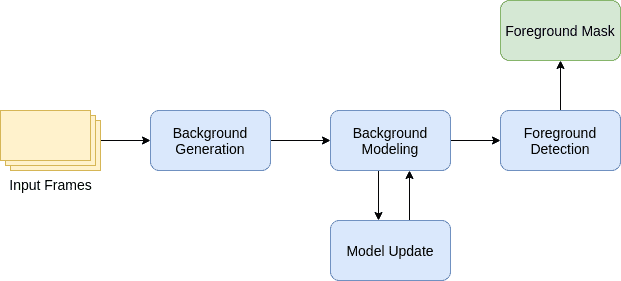


## Descriptors: 

- Descriptors, or features, define image regions in the current video frame for mapping with a known background model.
- Color, texture, and edge descriptors can be used for distinguishing regions from background or foreground.
- BS-algorithm design should consider challenging factors such as illumination, oscillations, and movement of objects.
- Static background areas can be identified based on fixed colors, but foreground objects and illumination variations can distort colors.

### Types of Descriptors: 

Frame pixel values can be obtained during video processing; these are used in for BS-algorithms. 

####  Pixel domain descriptors:

Popular pixel domain descriptors include color, edge, and texture.

- **Color** features are descriptive object features that react to illumination changes and are sensitive to camouflage and shadows.
- **Edge** features are robust to light variations and good for detecting moving objects, but sensitive to both high and low textured objects.
- **Texture** features provide spatial information and are robust to illumination and shadows, and can be applied in - - Local Binary Pattern (LBP) features.


These descriptors are often combined with each other for more robustness in video analysis.



#### 1 Local Binary Pattern (LBP) 
paper:  http://www.ee.oulu.fi/research/imag/mvg/files/pdf/pdf_662.pdf
is a gray-scale invariant texture primitive statistic used for texture description in video analysis. LBP produces a binary pattern by thresholding neighboring pixel values with the center pixel value.
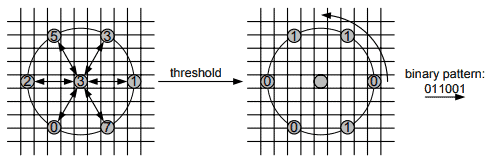

LBP can be extended to more neighboring pixels but lacks intensity tracking, which can cause failure in detecting changes.


#### Local Binary Similarity Patterns (LBSP)  
paper: https://ieeexplore.ieee.org/document/6569191
was introduced in 2013 to solve LBP's issue using absolute difference thresholding but lacks spatiotemporal information.

#### Self-balanced sensitivity segmenter (SuBSENSE)
paper: https://openaccess.thecvf.com/content_cvpr_workshops_2014/W12/papers/St-Charles_Flexible_Background_Subtraction_2014_CVPR_paper.pdf

uses improved spatiotemporal LBSP with color features for robust background subtraction.


#### Background Subtraction using Local SVD Binary Pattern (LSBP)
paper: https://pdfs.semanticscholar.org/b098/5612b033854763080a9d42adddbe10b2be72.pdf

is robust to illumination variations, shadows, and noise by using SVD coefficients for illumination invariant characterization.

## SuBSENSE Algorithm

Suppose there is a video sequence as an input. Then $I_{t}(x)$ is the result of the $t$-th frame (at time $t$) spatial analysis, wherex is a pixel index. The background model block is a non-parametric statical model. It produces the background at pixel locations denoted by $B(x)$ on the basis of 50 past representations (samples) $N$. $S_{t}(x)$ is a segmentation output. Its has the following values:

- $S_{t}(x) = 0$ : the pixel is marked as background, if there is an intersection of at least 2 samples with the representation of $x$ in the $t$-th frame $(I_{t}(x))$
- $S_{t}(x) = 1$: the pixel is automatically marked as foreground in the opposite cases.


SuBSENSE solves the background subtraction problem as a classification task, where a pixel value is analyzed due to its neighboring pixels in the feature space. Hence, $B(x)={B_{1}(x),B_{2}(x), ..., B_{N}(x)}$ – modeling of pixel $x$ relying on the $N$ samples. These samples are randomly chosen at the background model initialization time. The SuBSENSE analysis core is color comparison and LBSP descriptors, calculated on the color channels. 

Thus, $B_{n}(x)$, where $n \in [1, N]$ include the following: 
$$B_{n}(x)={R_{n}(x),G_{n}(x),B_{n}(x),LBSP_{n}^{R}(x),LBSP_{n}^{G}(x),LBSP_{n}^{B}(x)}$$
.

$B(x)$ and $I_{t}(x)$ are matched through the color values and LBSP-descriptors.

For the colors comparison L1 distance is used, whereas descriptors are compared with the Hamming distance. The resulting mask is binary and can be described as:

$$
M_t(x) = \begin{cases} 1, & \mbox{if } {dist(I_{t}(x), B_{t}(x)) < D_{max}, \forall n}<2 \\ 0, & \mbox{otherwise } \end{cases}
$$

$D_{max}$ is the threshold of the maximum distance. Its value is dynamically assigned in accordance with the model loyalty, segmentation noise.

### Implementation in OpenCV  (Still need to fix)

In [13]:
# install the pybgslibrary if it isn't on your system.
!pip install pybgs

     -------------------------------------- 622.8/622.8 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for pybgs
Failed to build pybgs
  Running setup.py install for pybgs: started
  Running setup.py install for pybgs: finished with status 'error'


  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [7 lines of output]
      running bdist_wheel
      running build
      running build_ext
      Preparing the build environment
      Configuring cmake project
      cmake -HC:\Users\jorge\AppData\Local\Temp\pip-install-qe2uwx3d\pybgs_1cb54b0cd1fe41d697593b29e35cd8e2 -Bbuild\temp.win-amd64-cpython-310\Release -DPYTHON_EXECUTABLE=C:\Users\jorge\anaconda3\envs\ComputerVision\python.exe -DBGS_CORE_STATIC=ON -DBGS_PYTHON_SUPPORT=ON -DBGS_PYTHON_ONLY=ON -DBGS_PYTHON_VERSION=3.10
      error: command 'cmake' failed: None
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pybgs
  error: subprocess-exited-with-error
  
  × Running setup.py install for pybgs did not run successfully.
  │ exit code: 1
  ╰─> [9 lines of output]
      running install
      C:\Users\jorge\anaconda3\en

In [ ]:
import numpy as np
import cv2
import pybgs as bgs
import sys
import glob


default="space_traffic.mp4"

captured_video = cv2.VideoCapture(video_to_process)
if not captured_video.isOpened:
    print("Unable to open: " + video_to_process)
    exit(0)
    
# instantiate background subtraction
background_subtr_method = bgs.SuBSENSE()

while True:
    # read video frames
    retval, frame = captured_video.read()
 
    # check whether the frames have been grabbed
    if not retval:
        break
 
    # resize video frames
    frame = cv2.resize(frame, (640, 360))
 
    # pass the frame to the background subtractor
    foreground_mask = background_subtr_method.apply(frame)
    # obtain the background without foreground mask
    img_bgmodel = background_subtr_method.getBackgroundModel()
    
    
    cv2.imshow("Initial Frames", frame)
    cv2.imshow("Foreground Masks", foreground_mask)
    cv2.imshow("Subtraction result", img_bgmodel)
 
    keyboard = cv2.waitKey(10)
    if keyboard == 27:
        break

# Evaluation Benchmarks  of CDNET

https://orbi.uliege.be/bitstream/2268/242584/1/Laugraud2018Challenges.pdf

ChangeDetection.NET (CDNET) is a widely used benchmark dataset for evaluating background subtraction algorithms. provide a common platform for comparing the performance of different background subtraction algorithms.

http://changedetection.net/



There website states: 

- The identification of changing or moving areas in the field of view of a camera is a fundamental pre-processing step in computer vision and video processing. Example applications include visual surveillance (e.g., people counting, action recognition, anomaly detection, post-event forensics), smart environments (e.g., room occupancy monitoring, fall detection, parking occupancy detection), and video retrieval (e.g., activity localization and tracking). Although subsequent processing may be different in each case, typically one has to start with the identification of regions of interest which, in the case of video, are either short-term changes, i.e., video dynamics (motion), or long-term changes, i.e., appearing/disappearing objects and structural changes. Clearly, motion and change detection are only pre-processing steps for subsequent tracking, classification, or estimation, albeit important ones.

- To date, many motion and change detection algorithms have been developed that perform well in some types of videos, but most are sensitive to sudden illumination changes, environmental conditions (night, rain, snow, air turbulence), background/camera motion, shadows, and camouflage effects (photometric similarity of object and background). There is no single algorithm today that seems to be able to simultaneously address all the key challenges that accompany real-world (non-synthetic) videos. In fact, no single, realistic, large-scale dataset exists that covers a range of challenges present in the real world and includes accurate ground truths.




## Data Sets
In the current post, we will use two datasets from ChangeDetection.NET(CDNET): CDNET-2012 and CDNET-2014 to provide an evaluation of the proposed BS-methods. CDNET data set is frequently used video collection for evaluation of algorithms due to the variety of its content: categories, input frames and corresponding ground truth (GT) images. There are 6 categories in CDNET-2012 and 11 in CDNET-2014. Let’s quickly look through them and view the video fragments:




- **CDNET-2012** is the first version of the CDNET dataset, which contains 12 video sequences with different challenges, such as illumination changes, dynamic backgrounds, camera jitter, and moving objects. Each sequence is provided with ground-truth annotation, which indicates the pixel-wise segmentation of the foreground objects. The dataset has been widely used to evaluate the performance of various background subtraction algorithms, including statistical, spectral, and texture-based methods.

- **CDNET-2014** is the updated version of the CDNET dataset, which contains 54 video sequences with more complex challenges, such as shadows, reflections, and intermittent object motion. The dataset is organized into three categories: baseline, dynamic background, and camera jitter. The baseline category contains sequences with static backgrounds and simple object motion, while the dynamic background category contains sequences with complex object motion and dynamic backgrounds. The camera jitter category contains sequences with camera motion and abrupt changes in the viewpoint. Like CDNET-2012, each sequence in CDNET-2014 is provided with ground-truth annotation, which enables the objective evaluation of background subtraction algorithms.




### Common categories:
    
1. **baseline:** 4 videos with a statical background containing moving foreground objects
2. **cameraJitter:** 4 videos with slight camera oscillation effect
3. **dynamicBackground:** 6 videos with partly moving background and dynamic foreground
4. **intermittentObjectMotion:** 6 videos containing statical background with periodic moving foreground entities
5. **shadow:** 6 video sequences, which contain the shadows of the foreground objects
6. **thermal:** 5 videos obtained from a thermal camera

7. (Introduced in CDNET-2014: **badWeather:** 4 videos of traffic with poor visibility, distorted by snowfall images
8. **lowFramerate:** 4 video sequences with the low frame rate
9. **nightVideos:** 6 videos containing low illuminated views
10. **PTZ:** 4 video sequences obtained with a pan-tilt-zoom camera (dynamic foreground: rotation, zoom; slight oscillation effect)
11. **turbulence:** 4 videos distorted with a slight ripple.

In [ ]:
import cv2
#import pybgs as bgs
 
ALGORITHMS_TO_EVALUATE = [
    (cv2.bgsegm.createBackgroundSubtractorGSOC, "GSoC", {}),   
    
    #...  OTHERS...
    
    #(bgs.SuBSENSE, "SuBSENSE", {}),  ###  Problems with install
]

## Comparing Quality Metrics of the Algorithms

Iterating over ALGORITHMS_TO_EVALUATE the specified background subtraction models are instantiated. To compute a foreground mask the apply(frame) method should be called. The mask list accumulates obtained foreground masks for further calculation of the algorithm **quality metrics**. 


Summary of key parameters: 

- true positives (**TP**): properly masked objects
- true negatives (**TN**): properly not masked objects
- false positives (**FP**): improperly masked objects
- false negatives (**FN**): improperly not masked objects.


Now, given TP, TN, FP and FN values we can calculate precision, recall and, finally, F1-measure and accuracy value:

#### precision:  
the ratio of true positives in the obtained results: 
$$\frac{TP}{TP+FP}$$

#### recall: 
the amount of true positives found among all the ground truth: 
$$\frac{TP}{TP+FN}$$

#### F1-measure (FM)
$$2\times\frac{precision\times recall}{precision+recall}=\frac{2TP}{2TP+FP+FN}$$

#### Accuracy:
$$\frac{TP+TN}{TP+TN+FP+FN}$$


# Evaluation Pipelines:

To evaluate the algorithms we will use evaluator.py, based on opencv-contrib evaluation pipeline. To run the script we need to obtain the data set, in our case CDnet-2012 and CDnet-2014. The path to the data should be specified in --dataset_path required parameter. The below line initiates evaluation execution:


#### Relevant Links
1. https://github.com/opencv/opencv_contrib/blob/master/modules/bgsegm/samples/evaluation.py
2. https://github.com/opencv/opencv_contrib/blob/master/modules/bgsegm/samples/evaluation.py
3. http://jacarini.dinf.usherbrooke.ca/dataset2012
4. http://jacarini.dinf.usherbrooke.ca/dataset2014





# Exercises

1. The script [evaluation.py](https://github.com/opencv/opencv_contrib/blob/master/modules/bgsegm/samples/evaluation.py) script has been modified (see the accompanying notebook for following the evaluation) so that you can compare the different background subtraction algorithms we described above on the CDnet dataset.  From the results, make tables using the different categories.  Explain your results.  In which ways to the bgsegm  algorithms improve over the classical methods?


As mentioned, this steps for this are in the accompanying notebook.